## Exercise Set 2 for OSM 

### Dynamic Programming with John Stachurski
### Ildebrando Magnani, joint work with Francesco Furno

Exercises for the [OSM](https://bfi.uchicago.edu/osm) bootcamp dynamic programming section.

We will use the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

### Exercise 1

Consider the setting of the [stochastic optimal growth model](https://lectures.quantecon.org/py/optgrowth.html), with the same notation and same assumptions on the primitives $u$, $f$, $\beta$ and $\phi$. 

Let $\mathscr C$ be all continuous bounded functions on $\mathbb R_+$.

Let $\sigma \in \Sigma$ be any feasible policy and let $U$ be the operator from $\mathscr C$ to itself defined by

$$ Uw(y) = u(\sigma(y)) + \beta \int w(f(y - \sigma(y))z) \phi(dz) \qquad (y \in \mathbb R_+)$$

Prove that $U$ is a contraction mapping with respect to the supremum distance.  Argue that the unique fixed point of $U$ in $\mathscr C$ is $v_\sigma$.

("Argue" means provide a sketch of a proof that contains the key ideas, plus some intuition.  Or give a complete, formal proof, if you can.)

## Solution to Exercise 1

There are two ways to show that $U$ is a contraction mapping with respect to the supremum distance. The first one is to appeal to Blackwell's theorem. To do that, it suffices to show that $U$ satisfies both the monotonicity and the discounting conditions.

The other way is to prove directly the definition of a contraction map. Let $w,v$ be continuous bounded functions on $\mathbb R_+$:

$$ d_{\infty}(Uw,Uv) = sup \left| Uw - Uv \right| $$

$$ = sup \left| \beta \int [ w - v ] \right| $$

$$ = \beta sup \left| \int [ w - v ] \right| $$

$$ \leq \beta sup \int \left| [w - v] \right| $$

$$ \leq  \beta sup \left| w - v \right| $$

$$ = \beta d_{\infty}(w,v) $$

Where the last inequality follows from the fact that the integral is an expectation. Since $\beta \in (0,1)$, $U(.)$ is a contraction map.

Since $U(.)$ is a contraction map on a complete metric space, by the Contraction Mapping Theorem it has a unique fixed point. Call this fixed point $v$. Then:

$$ Uv = v \Rightarrow v(y) = u(\sigma(y)) + \beta \int v(f(y - \sigma(y)z) $$

Notice that in every period we have that $y' = f(y - \sigma(y))z$, where $y$ stands for the current period value and $y'$ stands for next period value. Therefore we have that:

$$v(y) = u(\sigma(y)) + \beta \int v(y') $$

$$ = u(\sigma(y)) + \beta \int \left[ u(\sigma(y')) + \beta \int v(y'') \right] $$

$$ = u(\sigma(y)) + \beta \int u(\sigma(y')) + \beta^2 \int u(\sigma(y'')) + ...  $$

$$  = \mathbb{E} \sum_t \beta^t u(\sigma(y_t)) = v_{\sigma} $$


### Exercise 2

Notation and concepts continue from exercise 2.

Use the fact you proved in exercise 2, combined with piecewise linear interpolation method we used for the Bellman operator, to compute and plot good approximations of the value $v_\sigma$ of the policies

* $\sigma_1(y) = 0.95 y$
* $\sigma_2(y) = H(y) y$ where $H$ is the cdf of the lognormal $LN(0, 0.5)$ distribution.

For the latter use `scipy.stats.lognorm.cdf(y, 0.5)`

For the primitives, use the default specification in the `LogLinearOG` class from the [stochastic optimal growth model lecture](https://lectures.quantecon.org/py/optgrowth.html).

Plot your results, choosing grid and plotting dimensions to best illustrate the two functions.  Based on the plot alone, argue that neither of these policies is an optimal policy.

## Solutions to Exercise 2

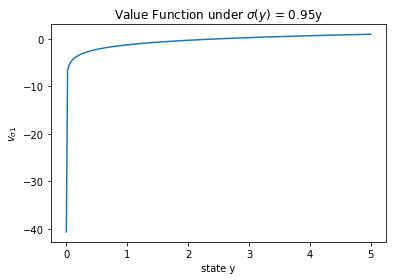

C:\Users\Francesco\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


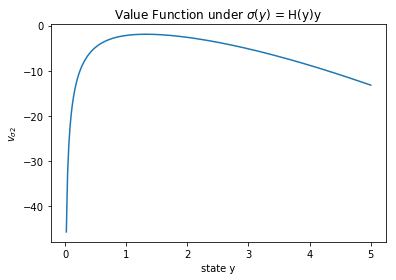

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Parameters 
alpha=0.4
beta=0.96
mu=0
s=0.1

# Utility Function
def u(x):
    return np.log(x)

# Production Function
def f(x):
    return x**alpha 

# Policy Function 1
def sigma1(x):
    return 0.95*x

# Policy Function 2
def sigma2(x):
    return scipy.stats.lognorm.cdf(x, 0.5)*x


# Grid Preparation
gridmin = 0.000000001
gridmax = 5
gridpoints = 250
grid = np.linspace(gridmin, gridmax, gridpoints)
shock_size = 250 
shocks = np.exp(mu + s * np.random.randn(shock_size))

# Operator
def operator(w, grid, beta, u, f, sigma, shocks, Tw=None):
    if Tw == None:
        Tw = np.empty_like(w)
    w = w.flatten()
    w_linfunc= lambda x: np.interp(x, grid, w)     # Interpolation

    for i,value in enumerate(grid):
        Tw[i] = u(sigma(value)) + beta * np.mean(w_linfunc(f(value - sigma(value)) * shocks))
    return Tw



# Finding the fixed point (i.e. the policy value function)
def fixedpoint(operator, w, grid, beta, u, f, sigma, shocks, tolerance):
    error = 1
    while (error > tolerance):
        Tw = operator(w, grid, beta, u, f, sigma, shocks)
        Tw = Tw.reshape(gridpoints, 1)
        error = np.max(Tw-w)  # using the sup norm as a metric
        w = Tw                # preparing for next iteration
    return w

w0 = np.zeros(gridpoints)  # Initial guess
v1 = fixedpoint(operator, w0, grid, beta, u, f, sigma1, shocks,0.00000001) 
plt.plot(grid, v1)
plt.xlabel('state y')
plt.ylabel('$v_{\sigma1}$')
plt.title('Value Function under $\sigma(y)$ = 0.95y')
plt.show()

v2 = fixedpoint(operator, w0, grid, beta, u, f, sigma2, shocks, 0.00000001) 
plt.plot(grid, v2)
plt.xlabel('state y')
plt.ylabel('$v_{\sigma2}$')
plt.title('Value Function under $\sigma(y)$ = H(y)y')
plt.show()


Clearly, among the two suggested policies, the first one is the optimal one: this is because as production increases, the second policy leads to a reduction in the total utility of the problem. Such a behavior is clearly inefficient.